# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [54]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [55]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [56]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [57]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [58]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [59]:
from keras.models import Sequential
from keras.layers import Dense

In [60]:
#建立模型
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='relu'))

In [61]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [62]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [63]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 24s 490us/step - loss: 2.2919 - accuracy: 0.7545 - val_loss: 2.2687 - val_accuracy: 0.6794
Epoch 2/10
48000/48000 [==============================] - 23s 486us/step - loss: 2.0512 - accuracy: 0.7676 - val_loss: 1.9857 - val_accuracy: 0.8204
Epoch 3/10
48000/48000 [==============================] - 23s 488us/step - loss: 1.9471 - accuracy: 0.7455 - val_loss: 2.0310 - val_accuracy: 0.7983
Epoch 4/10
48000/48000 [==============================] - 23s 484us/step - loss: 2.0173 - accuracy: 0.8022 - val_loss: 2.0339 - val_accuracy: 0.7944
Epoch 5/10
48000/48000 [==============================] - 23s 486us/step - loss: 1.9806 - accuracy: 0.8084 - val_loss: 1.9005 - val_accuracy: 0.8512
Epoch 6/10
48000/48000 [==============================] - 23s 483us/step - loss: 1.8822 - accuracy: 0.8309 - val_loss: 1.8798 - val_accuracy: 0.8471
Epoch 7/10
48000/48000 [==============================] 

# 以圖形顯示訓練過程

In [64]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

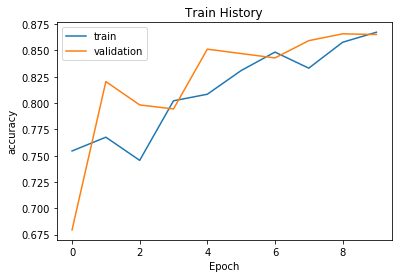

In [65]:
show_train_history(train_history,'accuracy','val_accuracy')

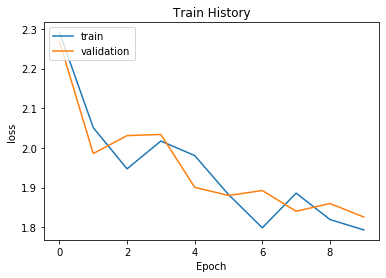

In [66]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [67]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print(scores)
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 52us/step
[1.875644181084633, 0.8632000088691711]
accuracy= 0.8632000088691711
